In [1]:
# loction
import os
os.getcwd()

'C:\\Users\\Shree'

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#inline statement - displays the graphs in the current notebook
%matplotlib inline
from sklearn.model_selection import train_test_split, LeaveOneOut, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn import preprocessing

In [3]:
data = pd.read_csv("Concrete_Data.csv")
data

,Cement,Blast_Furnace_Slag,Fly_ Ash,Water,Superplasticizer,Coarse_ Aggregate,Fine_ Aggregate,Age,Concrete _compressive _strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
data.describe()

,Cement,Blast_Furnace_Slag,Fly_ Ash,Water,Superplasticizer,Coarse_ Aggregate,Fine_ Aggregate,Age,Concrete _compressive _strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
data.shape

(1030, 9)

In [6]:
data.isnull().values.any()

False

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Cement                           1030 non-null   float64
 1   Blast_Furnace_Slag               1030 non-null   float64
 2   Fly_ Ash                         1030 non-null   float64
 3   Water                            1030 non-null   float64
 4   Superplasticizer                 1030 non-null   float64
 5   Coarse_ Aggregate                1030 non-null   float64
 6   Fine_ Aggregate                  1030 non-null   float64
 7   Age                              1030 non-null   int64  
 8   Concrete _compressive _strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
data.dtypes

Cement                             float64
Blast_Furnace_Slag                 float64
Fly_ Ash                           float64
Water                              float64
Superplasticizer                   float64
Coarse_ Aggregate                  float64
Fine_ Aggregate                    float64
Age                                  int64
Concrete _compressive _strength    float64
dtype: object

In [9]:
data.isnull().values.any()

False

In [10]:
data.isnull().sum()

Cement                             0
Blast_Furnace_Slag                 0
Fly_ Ash                           0
Water                              0
Superplasticizer                   0
Coarse_ Aggregate                  0
Fine_ Aggregate                    0
Age                                0
Concrete _compressive _strength    0
dtype: int64

# univariate analysis

<AxesSubplot:xlabel='Concrete _compressive _strength', ylabel='count'>

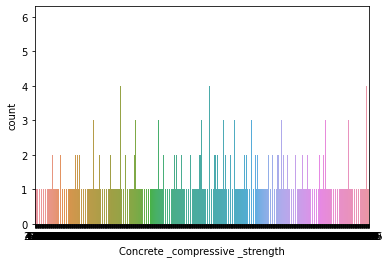

In [11]:
# count plot (Univariate)
sns.countplot(data=data,x='Concrete _compressive _strength')

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Water ', ylabel='Density'>

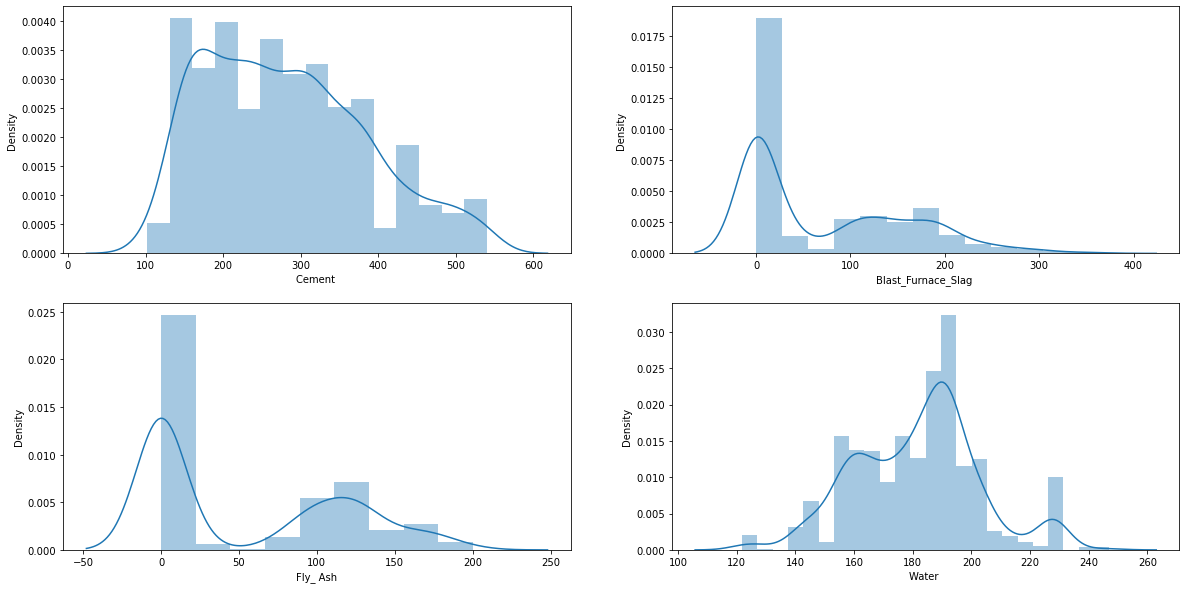

In [12]:
# distribution plots as subplots (Univariate)
fig,axes = plt.subplots(2,2, figsize=(20,10))
sns.distplot(data['Cement '].dropna(),kde=True,ax=axes[0,0])
sns.distplot(data['Blast_Furnace_Slag '].dropna(),kde=True,ax=axes[0,1])
sns.distplot(data['Fly_ Ash'].dropna(),kde=True,ax=axes[1,0])
sns.distplot(data['Water '].dropna(),kde=True,ax=axes[1,1])


In [13]:
data.columns

Index(['Cement ', 'Blast_Furnace_Slag ', 'Fly_ Ash', 'Water ',
       'Superplasticizer ', 'Coarse_ Aggregate', 'Fine_ Aggregate ', 'Age ',
       'Concrete _compressive _strength'],
      dtype='object')

# Check Outliers

# Using boxplot and IQR

{'whiskers': [<matplotlib.lines.Line2D at 0x2336c13e580>,
 'caps': [<matplotlib.lines.Line2D at 0x2336c0e5730>,
 'boxes': [<matplotlib.lines.Line2D at 0x2336c13efd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2336c115a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2336c0d2850>],
 'means': []}

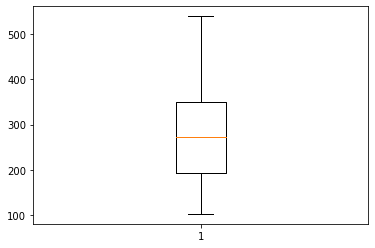

In [14]:
plt.boxplot(data['Cement '])

In [15]:
Q1 = data['Cement '].quantile(0.25)
Q3 = data['Cement '].quantile(0.75)
Q1,Q3

(192.375, 350.0)

In [16]:
IQR = Q3 - Q1
IQR

157.625

In [17]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-44.0625, 586.4375)

inter Quartile Range:
IQR divides the values into three quartiles Q1,Q2 & Q3.Q2 represents the median of the range.
Here we find the lower limit and upper limit of the range.


In [18]:
data[(data['Cement ']<lower_limit)|(data['Cement ']>upper_limit)]

,Cement,Blast_Furnace_Slag,Fly_ Ash,Water,Superplasticizer,Coarse_ Aggregate,Fine_ Aggregate,Age,Concrete _compressive _strength


Observations: Cement
The values obtained less than lower limit and more than upper limit is '0'.
There were no outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x2336c1dcd00>,
 'caps': [<matplotlib.lines.Line2D at 0x2336c1ea400>,
 'boxes': [<matplotlib.lines.Line2D at 0x2336c1dc9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2336c1eaac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2336c1eae20>],
 'means': []}

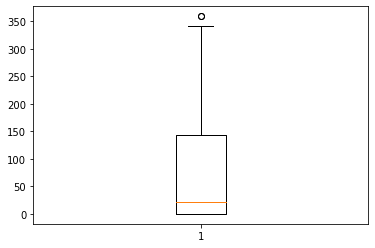

In [19]:
plt.boxplot(data['Blast_Furnace_Slag '])

In [20]:
Q1 = data['Blast_Furnace_Slag '].quantile(0.25)
Q3 = data['Blast_Furnace_Slag '].quantile(0.75)
Q1, Q3

(0.0, 142.95)

In [21]:
IQR = Q3 - Q1
IQR

142.95

In [22]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-214.42499999999998, 357.375)

In [23]:
data[(data['Blast_Furnace_Slag ']<lower_limit)|(data['Blast_Furnace_Slag ']>upper_limit)]

,Cement,Blast_Furnace_Slag,Fly_ Ash,Water,Superplasticizer,Coarse_ Aggregate,Fine_ Aggregate,Age,Concrete _compressive _strength
553,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42
559,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44


Observations: BlastFurnace
Two values were obtained from less than lower limit and more than upper limit.
There were '2' outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x2336c2523d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2336c252a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2336c252070>],
 'medians': [<matplotlib.lines.Line2D at 0x2336c25d190>],
 'fliers': [<matplotlib.lines.Line2D at 0x2336c25d4f0>],
 'means': []}

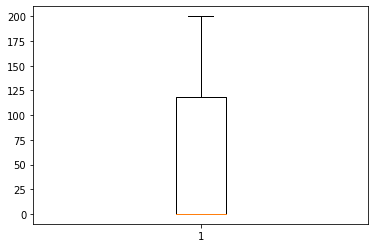

In [24]:
plt.boxplot(data['Fly_ Ash'])

In [25]:
Q1 = data['Fly_ Ash'].quantile(0.25)
Q3 = data['Fly_ Ash'].quantile(0.75)
Q1, Q3

(0.0, 118.3)

In [26]:
IQR = Q3 - Q1
IQR

118.3

In [27]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-177.45, 295.75)

In [28]:
data[(data['Fly_ Ash']<lower_limit)|(data['Fly_ Ash']>upper_limit)]

,Cement,Blast_Furnace_Slag,Fly_ Ash,Water,Superplasticizer,Coarse_ Aggregate,Fine_ Aggregate,Age,Concrete _compressive _strength


Observations: FlyAsh
The values obtained less than lower limit and more than upper limit is '0'.
There were no outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x2336c2bd100>,
 'caps': [<matplotlib.lines.Line2D at 0x2336c2bd7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2336c2add60>],
 'medians': [<matplotlib.lines.Line2D at 0x2336c2bde80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2336c2c8220>],
 'means': []}

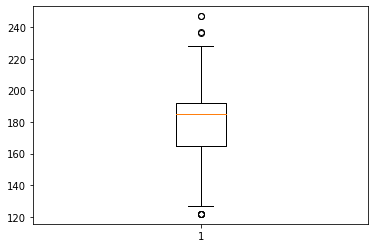

In [29]:
plt.boxplot(data['Water '])

In [30]:
Q1 = data['Water '].quantile(0.25)
Q3 = data['Water '].quantile(0.75)
Q1, Q3

(164.9, 192.0)

In [31]:
IQR = Q3 - Q1
IQR

27.099999999999994

In [32]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(124.25000000000001, 232.64999999999998)

In [33]:
data[(data['Water ']<lower_limit)|(data['Water ']>upper_limit)]

,Cement,Blast_Furnace_Slag,Fly_ Ash,Water,Superplasticizer,Coarse_ Aggregate,Fine_ Aggregate,Age,Concrete _compressive _strength
224,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
225,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82
226,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
227,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
228,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
862,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
873,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
936,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
1019,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23


Observations: Water
Nine values were obtained from less than lower limit and more than upper limit.
There were '9' outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x2336c31c370>,
 'caps': [<matplotlib.lines.Line2D at 0x2336c31ca30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2336c30dfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2336c32a130>],
 'fliers': [<matplotlib.lines.Line2D at 0x2336c32a490>],
 'means': []}

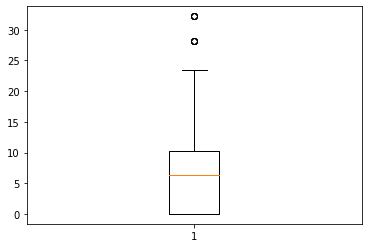

In [34]:
plt.boxplot(data['Superplasticizer '])

In [35]:
Q1 = data['Superplasticizer '].quantile(0.25)
Q3 = data['Superplasticizer '].quantile(0.75)
Q1, Q3

(0.0, 10.2)

In [36]:
IQR = Q3 - Q1
IQR

10.2

In [37]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-15.299999999999999, 25.5)

In [38]:
data[(data['Superplasticizer ']<lower_limit)|(data['Superplasticizer ']>upper_limit)]

,Cement,Blast_Furnace_Slag,Fly_ Ash,Water,Superplasticizer,Coarse_ Aggregate,Fine_ Aggregate,Age,Concrete _compressive _strength
76,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
79,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3
99,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
102,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
122,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
125,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
145,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
148,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
168,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
171,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2


Observations: Superplasticizer
Ten values were obtained from less than lower limit and more than upper limit.
There were '10' outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x2336c3825e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2336c382ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2336c382280>],
 'medians': [<matplotlib.lines.Line2D at 0x2336c38d3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2336c38d700>],
 'means': []}

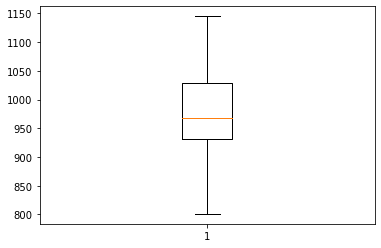

In [39]:
plt.boxplot(data['Coarse_ Aggregate'])

In [40]:
Q1 = data['Coarse_ Aggregate'].quantile(0.25)
Q3 = data['Coarse_ Aggregate'].quantile(0.75)
Q1, Q3

(932.0, 1029.4)

In [41]:
IQR = Q3 - Q1
IQR

97.40000000000009

In [42]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(785.8999999999999, 1175.5000000000002)

In [43]:
data[(data['Coarse_ Aggregate']<lower_limit)|(data['Coarse_ Aggregate']>upper_limit)]

,Cement,Blast_Furnace_Slag,Fly_ Ash,Water,Superplasticizer,Coarse_ Aggregate,Fine_ Aggregate,Age,Concrete _compressive _strength


Observations: CoarseAggregate
The values obtained less than lower limit and more than upper limit is '0'.
There were no outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x2336c3dfdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x2336c3ee4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2336c3dfa60>],
 'medians': [<matplotlib.lines.Line2D at 0x2336c3eeb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2336c3eeee0>],
 'means': []}

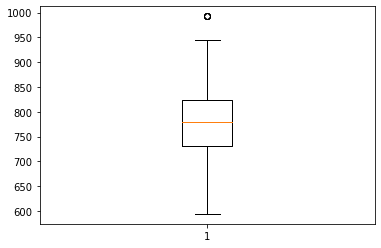

In [44]:
plt.boxplot(data['Fine_ Aggregate '])

In [45]:
Q1 = data['Fine_ Aggregate '].quantile(0.25)
Q3 = data['Fine_ Aggregate '].quantile(0.75)
Q1, Q3

(730.95, 824.0)

In [46]:
IQR = Q3 - Q1
IQR

93.04999999999995

In [47]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(591.3750000000001, 963.5749999999999)

In [48]:
data[(data['Fine_ Aggregate ']<lower_limit)|(data['Fine_ Aggregate ']>upper_limit)]

,Cement,Blast_Furnace_Slag,Fly_ Ash,Water,Superplasticizer,Coarse_ Aggregate,Fine_ Aggregate,Age,Concrete _compressive _strength
74,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
97,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
120,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7
143,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
166,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5


Observations: FineAggregate
Five values were obtained from less than lower limit and more than upper limit.
There were '5' outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x2336c44ab20>,
 'caps': [<matplotlib.lines.Line2D at 0x2336c458220>,
 'boxes': [<matplotlib.lines.Line2D at 0x2336c44a7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2336c4588e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2336c458c40>],
 'means': []}

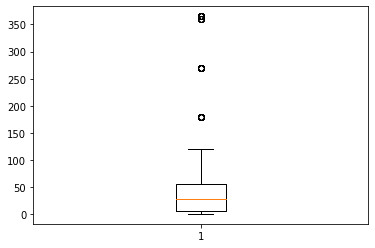

In [49]:
plt.boxplot(data['Age '])

In [50]:
Q1 = data['Age '].quantile(0.25)
Q3 = data['Age '].quantile(0.75)
Q1, Q3

(7.0, 56.0)

In [51]:
IQR = Q3 - Q1
IQR

49.0

In [52]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-66.5, 129.5)

In [53]:
data[(data['Age ']<lower_limit)|(data['Age ']>upper_limit)]

,Cement,Blast_Furnace_Slag,Fly_ Ash,Water,Superplasticizer,Coarse_ Aggregate,Fine_ Aggregate,Age,Concrete _compressive _strength
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
12,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270,43.01
17,342.0,38.0,0.0,228.0,0.0,932.0,670.0,365,56.14
19,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180,42.62
20,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
23,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,180,44.21
24,380.0,0.0,0.0,228.0,0.0,932.0,670.0,365,52.52


Observations: Age
Age has so many values obtained from less than lower limit and more than upper limit.
There were many outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x2336c4ba310>,
 'caps': [<matplotlib.lines.Line2D at 0x2336c4ba9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2336c4abf70>],
 'medians': [<matplotlib.lines.Line2D at 0x2336c4c60d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2336c4c6430>],
 'means': []}

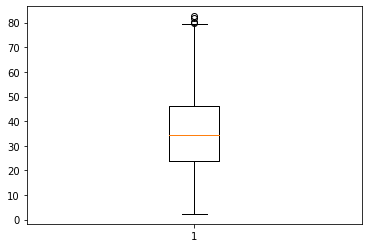

In [54]:
plt.boxplot(data['Concrete _compressive _strength'])

In [55]:
Q1 = data['Concrete _compressive _strength'].quantile(0.25)
Q3 = data['Concrete _compressive _strength'].quantile(0.75)
Q1, Q3

(23.71, 46.135000000000005)

In [56]:
IQR = Q3 - Q1
IQR

22.425000000000004

In [57]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-9.927500000000002, 79.77250000000001)

In [58]:
data[(data['Concrete _compressive _strength']<lower_limit)|(data['Concrete _compressive _strength']>upper_limit)]

,Cement,Blast_Furnace_Slag,Fly_ Ash,Water,Superplasticizer,Coarse_ Aggregate,Fine_ Aggregate,Age,Concrete _compressive _strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
153,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20
181,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
381,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75


Observations: ConcreteCompressiveStrength
Four values were obtained from less than lower limit and more than upper limit.
There were '4' outliers.

# #Remove Outliers

In [59]:
cols = ['Cement ', 'Blast_Furnace_Slag ', 'Fly_ Ash', 'Water ','Superplasticizer ', 'Coarse_ Aggregate', 'Fine_ Aggregate ', 'Age ','Concrete _compressive _strength'] 

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [60]:
data.shape

(941, 9)

# bi-variate analysis

<AxesSubplot:xlabel='Fine_ Aggregate ', ylabel='Concrete _compressive _strength'>

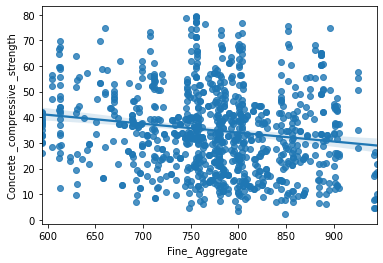

In [61]:
sns.regplot(x='Fine_ Aggregate ', y='Concrete _compressive _strength',data=data)

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Concrete _compressive _strength', ylabel='Density'>

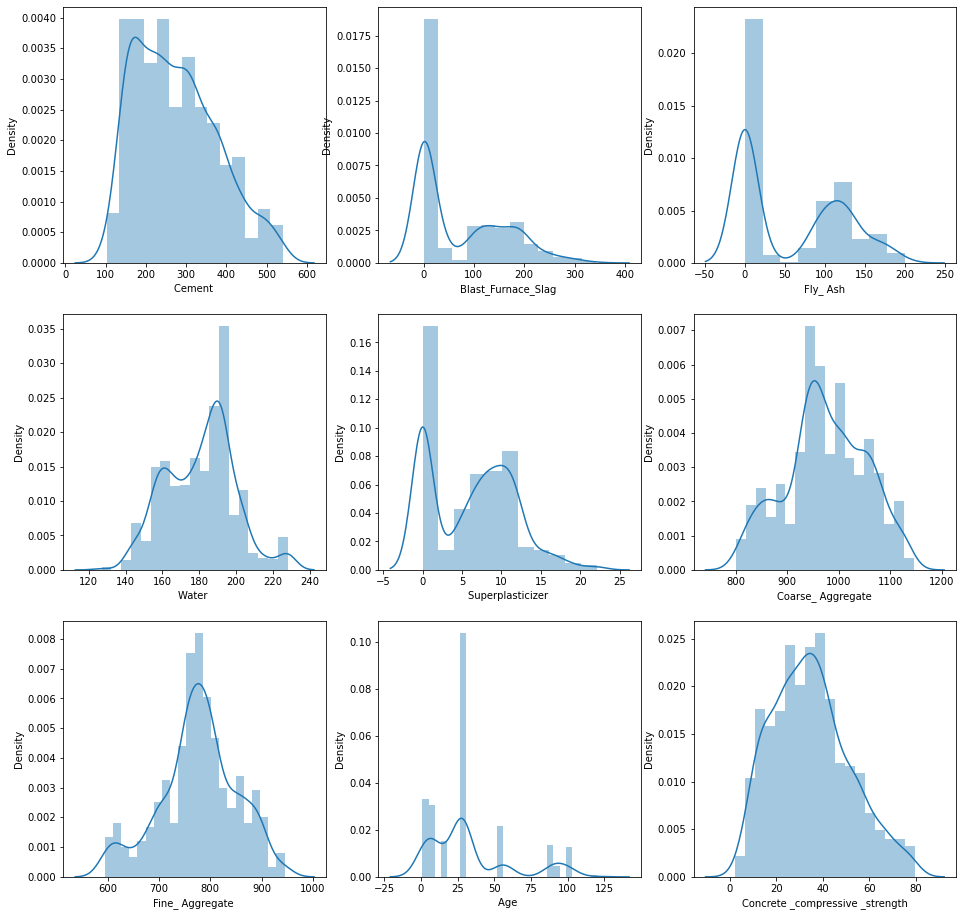

In [62]:
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(data['Cement '],ax=ax2[0][0])
sns.distplot(data['Blast_Furnace_Slag '],ax=ax2[0][1])
sns.distplot(data['Fly_ Ash'],ax=ax2[0][2])
sns.distplot(data['Water '],ax=ax2[1][0])
sns.distplot(data['Superplasticizer '],ax=ax2[1][1])
sns.distplot(data['Coarse_ Aggregate'],ax=ax2[1][2])
sns.distplot(data['Fine_ Aggregate '],ax=ax2[2][0])
sns.distplot(data['Age '],ax=ax2[2][1])
sns.distplot(data['Concrete _compressive _strength'],ax=ax2[2][2])

Observations:
Cement is almost normal.
BlastFurnace has three gausssians and rightly skewed.
FlyAsh has two gaussians and rightly skewed.
Water has three guassians and slighly left skewed.
Superplasticizer has two gaussians and rightly skewed.
CoarseAggregate has three guassians and almost normal.
FineAggregate has almost two guassians and looks like normal.
Age has multiple guassians and rightly skewed.
ConcreteCompressiveStrength looks like normal.

In [63]:
data.corr()

,Cement,Blast_Furnace_Slag,Fly_ Ash,Water,Superplasticizer,Coarse_ Aggregate,Fine_ Aggregate,Age,Concrete _compressive _strength
Cement,1.000000,-0.262949,-0.373968,-0.088639,0.032001,-0.099472,-0.239603,-0.036289,0.476763
Blast_Furnace_Slag,-0.262949,1.000000,-0.351422,0.113790,0.043895,-0.290074,-0.295298,-0.036781,0.141416
Fly_ Ash,-0.373968,-0.351422,1.000000,-0.250416,0.453972,-0.038463,0.064153,0.054812,-0.054794
Water,-0.088639,0.113790,-0.250416,1.000000,-0.641187,-0.208393,-0.364145,-0.022208,-0.369219
Superplasticizer,0.032001,0.043895,0.453972,-0.641187,1.000000,-0.224616,0.114265,0.045529,0.402702
Coarse_ Aggregate,-0.099472,-0.290074,-0.038463,-0.208393,-0.224616,1.000000,-0.179809,0.021818,-0.168207
Fine_ Aggregate,-0.239603,-0.295298,0.064153,-0.364145,0.114265,-0.179809,1.000000,0.045744,-0.156866
Age,-0.036289,-0.036781,0.054812,-0.022208,0.045529,0.021818,0.045744,1.000000,0.517506
Concrete _compressive _strength,0.476763,0.141416,-0.054794,-0.369219,0.402702,-0.168207,-0.156866,0.517506,1.000000


<AxesSubplot:>

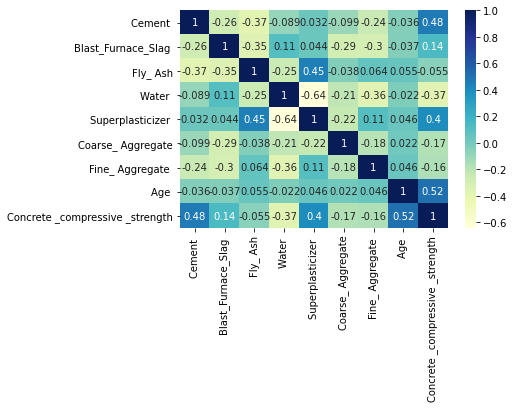

In [64]:
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu' )

In [65]:
datacorr = data.corr()
datacorr.style.background_gradient(cmap = 'summer')

,Cement,Blast_Furnace_Slag,Fly_ Ash,Water,Superplasticizer,Coarse_ Aggregate,Fine_ Aggregate,Age,Concrete _compressive _strength
Cement,1.000000,-0.262949,-0.373968,-0.088639,0.032001,-0.099472,-0.239603,-0.036289,0.476763
Blast_Furnace_Slag,-0.262949,1.000000,-0.351422,0.113790,0.043895,-0.290074,-0.295298,-0.036781,0.141416
Fly_ Ash,-0.373968,-0.351422,1.000000,-0.250416,0.453972,-0.038463,0.064153,0.054812,-0.054794
Water,-0.088639,0.113790,-0.250416,1.000000,-0.641187,-0.208393,-0.364145,-0.022208,-0.369219
Superplasticizer,0.032001,0.043895,0.453972,-0.641187,1.000000,-0.224616,0.114265,0.045529,0.402702
Coarse_ Aggregate,-0.099472,-0.290074,-0.038463,-0.208393,-0.224616,1.000000,-0.179809,0.021818,-0.168207
Fine_ Aggregate,-0.239603,-0.295298,0.064153,-0.364145,0.114265,-0.179809,1.000000,0.045744,-0.156866
Age,-0.036289,-0.036781,0.054812,-0.022208,0.045529,0.021818,0.045744,1.000000,0.517506
Concrete _compressive _strength,0.476763,0.141416,-0.054794,-0.369219,0.402702,-0.168207,-0.156866,0.517506,1.000000


10)What is the type of machine learning problem at hand? (Supervised or Unsupervised?) Why 
   answer: it is supervised machine learning and uses labeled inpout and out put data

11)What is the category of the machine learning problem at hand? (Classification or Regression?) Why? 
answer:its is classification machine learnin problem predict continouous values form of a probability for a class label

## Split the data into test and train data sets

It is extremely important to split the data into train and test sets. Train set is used to train the model and Test set is used to test the performance of the model.

Problems encountered if train test split not performed:

It does not make sense to talk about the performance of the model by testing it on same data. The model learns the data pretty well and when tested on same data will produce the best score.
The model becomes very specific to the training data, so far as they even get trained on the ocassional erroneous labels present in the training data. This results in Overfitting and the model might not work well outside the training data.
Therefore it is advised to keep a certian portion of the data aside (test set) untouched and test our model on this data to evaluate the true performance of the model.

X_train-all the predictors
Y_train-target variable (Concrete _compressive _strength)
X_test-all the predictors
Y_test-target variable (Concrete _compressive _strength)
Let's define X and Y before splitting the data

X = age

In [66]:
X = data.drop('Concrete _compressive _strength', axis=1)

In [67]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, data['Concrete _compressive _strength'], test_size=0.3, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(658, 8)
(283, 8)
(658,)
(283,)


# Regressions

### ** Multiple Linear Regression**

In [68]:
# Create an object lm for the LinearRegression model
lm = LinearRegression()
# Fit the model on the training data
lm.fit(X_train, Y_train)

LinearRegression()

In [69]:
import statsmodels.api as sm
X = data[['Cement ', 'Blast_Furnace_Slag ', 'Fly_ Ash', 'Water ',
       'Superplasticizer ', 'Coarse_ Aggregate', 'Fine_ Aggregate ', 'Age ',
       'Concrete _compressive _strength']]
Y = data['Concrete _compressive _strength']
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     Concrete _compressive _strength   R-squared (uncentered):                   1.000
Model:                                         OLS   Adj. R-squared (uncentered):              1.000
Method:                              Least Squares   F-statistic:                          1.424e+30
Date:                             Sat, 22 Jan 2022   Prob (F-statistic):                        0.00
Time:                                     13:25:01   Log-Likelihood:                          25710.
No. Observations:                              941   AIC:                                 -5.140e+04
Df Residuals:                                  932   BIC:                                 -5.136e+04
Df Model:                                        9                                                  
Covariance Type:                         nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Cement                          -1.076e-16    2.1e-16     -0.512      0.609    -5.2e-16    3.05e-16
Blast_Furnace_Slag               7.806e-18   2.17e-16      0.036      0.971   -4.19e-16    4.34e-16
Fly_ Ash                        -1.214e-16   2.88e-16     -0.421      0.674   -6.87e-16    4.45e-16
Water                            5.204e-16    6.3e-16      0.826      0.409   -7.16e-16    1.76e-15
Superplasticizer                 8.674e-16   3.31e-15      0.262      0.793   -5.63e-15    7.36e-15
Coarse_ Aggregate               -2.663e-16   1.02e-16     -2.610      0.009   -4.67e-16    -6.6e-17
Fine_ Aggregate                 -1.891e-16   1.22e-16     -1.549      0.122   -4.29e-16    5.04e-17
Age                             -1.561e-17   5.67e-16     -0.028      0.978   -1.13e-15     1.1e-15
Concrete _compressive _strength     1.0000   1.35e-15   7.39e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                       40.595   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.378
Skew:                          -0.356   Prob(JB):                     1.54e-07
Kurtosis:                       2.458   Cond. No.                         400.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Features and their respective coefficients
coeffs_data = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['Features', 'Estimated_Coefficients'])
coeffs_data.sort_values(by='Estimated_Coefficients', ascending=False)

,Features,Estimated_Coefficients
7,Age,0.309298
4,Superplasticizer,0.141495
0,Cement,0.100799
1,Blast_Furnace_Slag,0.072739
2,Fly_ Ash,0.048357
6,Fine_ Aggregate,-0.012637
5,Coarse_ Aggregate,-0.017911
3,Water,-0.263999


In [71]:
pos_coeffs_data= coeffs_data[(coeffs_data['Estimated_Coefficients'] >= 0)].sort_values(by='Estimated_Coefficients', ascending=False)
#pos_coeffs_data.sort_values(by='Estimated_Coefficients', ascending=False)
pos_coeffs_data

,Features,Estimated_Coefficients
7,Age,0.309298
4,Superplasticizer,0.141495
0,Cement,0.100799
1,Blast_Furnace_Slag,0.072739
2,Fly_ Ash,0.048357


#Regression Plot
Let us draw a regression plot between the test target values and predicted test values to assess how the model is performing.

Text(0.5, 1.0, 'Regression Plot for Actual vs Predicted Values')

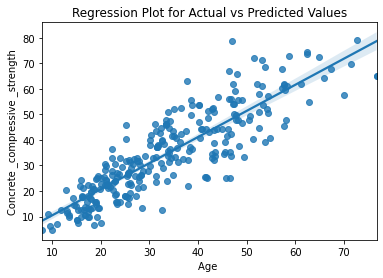

In [72]:
g = sns.regplot(x=lm.predict(X_test), y=Y_test, fit_reg=True)
g.set(xlabel='Age ', ylabel='Concrete _compressive _strength', title='Model Predictions')
plt.title('Regression Plot for Actual vs Predicted Values')

In [73]:
# R2 for train and test data
R2_reg_train = lm.score(X_train,Y_train)
R2_reg_test = lm.score(X_test,Y_test)
print('R squared for train data is: %.3f' %(R2_reg_train))
print('R squared for test data is: %.3f' %(R2_reg_test))

R squared for train data is: 0.777
R squared for test data is: 0.752


In [74]:
from math import sqrt
RMSE_reg_train = sqrt(np.mean((Y_train - lm.predict(X_train))**2))
RMSE_reg_test = sqrt(np.mean((Y_test - lm.predict(X_test))**2))
print('Root mean squared error for train data is: %.3f' %(RMSE_reg_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_reg_test))

Root mean squared error for train data is: 7.784
Root mean sqaured error for test data is: 8.390


## Residual Plots

Text(0.5, 1.0, 'Residual Plot using train data')

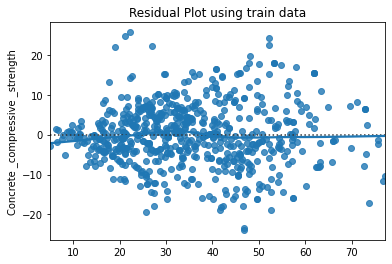

In [75]:
sns.residplot(x=lm.predict(X_train), y=Y_train, lowess=True)
plt.title('Residual Plot using train data')

Text(0.5, 1.0, 'Residual Plot using test data')

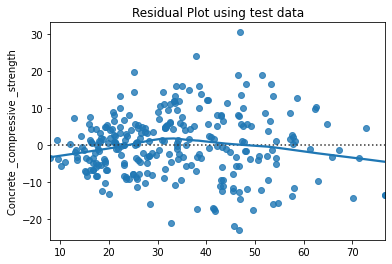

In [76]:
sns.residplot(x=lm.predict(X_test), y=Y_test, lowess=True)
plt.title('Residual Plot using test data')

Text(0, 0.5, 'Residuals')

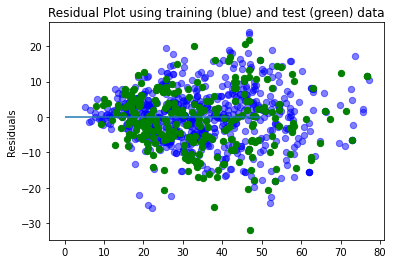

In [77]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

The blue dots represent train data and grren dots represent test data. From the residual plot above it is evident that the model is a good fit for test data as well.

# Ridge Regression

In [78]:
# Define the alphas 
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
# Create an object for RidgeCV
ridge_reg = RidgeCV(alphas=alphas, cv=None, store_cv_values=True)
# Fit the model to our training data
ridge_reg.fit(X_train,Y_train)

RidgeCV(alphas=array([1.e-15, 1.e-10, 1.e-08, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e+00,
       5.e+00, 1.e+01]),
        store_cv_values=True)

Let us calculate the  𝑅2  on both train and test sets to assess the performance of our model.

In [79]:
# R2 for train and test data respectively
R2_ridge_train = (ridge_reg.score(X_train, Y_train))
R2_ridge_test = (ridge_reg.score(X_test,Y_test))
print('R squared for train data is: %.3f' %(R2_ridge_train))
print('R squared for test data is: %.3f' %(R2_ridge_test))

R squared for train data is: 0.777
R squared for test data is: 0.752


The train set explains obtained an  𝑅2  of 0.612 and test set got an  𝑅2  of 0.623.
There is very little difference between train and test set, this signifies that the model is a good fit for data.

Let us calculate the RMSE values for train and test data sets

In [80]:
RMSE_ridge_train = sqrt(np.mean((Y_train - ridge_reg.predict(X_train))**2))
RMSE_ridge_test = sqrt(np.mean((Y_test - ridge_reg.predict(X_test))**2))
print('Root mean squared error for train data is: %.3f' %(RMSE_ridge_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_ridge_test))

Root mean squared error for train data is: 7.784
Root mean sqaured error for test data is: 8.390


Let us see the best alpha parameter for Ridge Regression

In [81]:
alpha_ridge_cv = ridge_reg.alpha_
print('The estimated best regularization parameter is: %.1f' %(alpha_ridge_cv))

The estimated best regularization parameter is: 10.0


### Regression Plot
Let us draw a regression plot between the actual and predicted data to see how well the regresssion line fits tha data.

Text(0.5, 1.0, 'Regression Plot for Actual vs Predicted Values')

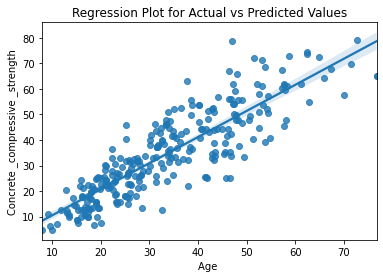

In [82]:
# Regression plot between actual and predicted prices 
g = sns.regplot(x=ridge_reg.predict(X_test), y=Y_test, fit_reg=True)
g.set(xlabel='Age ', ylabel='Concrete _compressive _strength', title='Model Predictions')
plt.title('Regression Plot for Actual vs Predicted Values')

The regression line looks like a not  good fit to the data, lot of outliers in the high data range.

Residual Plots
To drill down further let us plot some residual plots which helps giving better idea about the data. I decided to plot residual plots for train and test data seperately and another plot depicting train and test data points to get a better visual on data.

## Residual Plot - Train data

Text(0.5, 1.0, 'Residual Plot for train data')

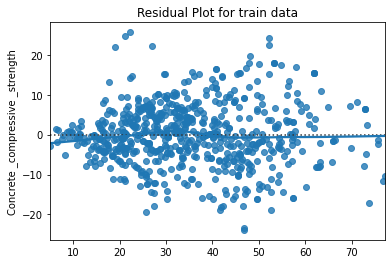

In [84]:
sns.residplot(x=ridge_reg.predict(X_train), y=Y_train, lowess=True)
plt.title('Residual Plot for train data')

### Residual Plot - Test data

Text(0, 0.5, 'Residuals')

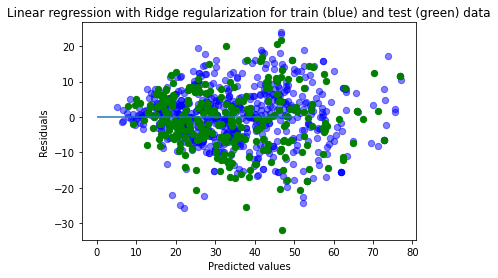

In [85]:
plt.scatter(ridge_reg.predict(X_train), ridge_reg.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(ridge_reg.predict(X_test), ridge_reg.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title("Linear regression with Ridge regularization for train (blue) and test (green) data")
plt.xlabel("Predicted values")
plt.ylabel('Residuals')

In [86]:
# Features and thier respective coefficients
ridge_coeffs_data = pd.DataFrame(list(zip(X.columns, ridge_reg.coef_)), columns = ['Features', 'Estimated_Coefficients'])
ridge_coeffs_data.sort_values(by='Estimated_Coefficients', ascending=False)

,Features,Estimated_Coefficients
7,Age,0.309292
4,Superplasticizer,0.141371
0,Cement,0.100807
1,Blast_Furnace_Slag,0.072748
2,Fly_ Ash,0.048372
6,Fine_ Aggregate,-0.012629
5,Coarse_ Aggregate,-0.017906
3,Water,-0.263984


In [87]:
ridge_pos_coeffs_data = ridge_coeffs_data[(ridge_coeffs_data['Estimated_Coefficients'])>=0].sort_values(by='Estimated_Coefficients', ascending=False)
ridge_pos_coeffs_data

,Features,Estimated_Coefficients
7,Age,0.309292
4,Superplasticizer,0.141371
0,Cement,0.100807
1,Blast_Furnace_Slag,0.072748
2,Fly_ Ash,0.048372


In [88]:
ridge_neg_coeffs_data = ridge_coeffs_data[(ridge_coeffs_data['Estimated_Coefficients'])<0].sort_values(by='Estimated_Coefficients',ascending = True)
ridge_neg_coeffs_data

,Features,Estimated_Coefficients
3,Water,-0.263984
5,Coarse_ Aggregate,-0.017906
6,Fine_ Aggregate,-0.012629


# Lasso Regression

In [89]:
# Define the alphas 
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
# Create an object for LassoCV
lasso_reg = LassoCV(alphas=alphas, cv=None, max_iter=50000, tol=0.1,selection='random')
# Fit the model to our training data
lasso_reg.fit(X_train,Y_train)

LassoCV(alphas=[1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01, 1, 5, 10],
        max_iter=50000, selection='random', tol=0.1)

Let us calculate the  𝑅2  on both train and test sets to assess the performance of our model.

In [90]:
# R2 for train and test data respectively
R2_train = (lasso_reg.score(X_train, Y_train))
R2_test = (lasso_reg.score(X_test,Y_test))
print('R squared for train data is: %.3f' %(R2_train))
print('R squared for test data is: %.3f' %(R2_test))

R squared for train data is: 0.775
R squared for test data is: 0.754


Now let us calculate the RMSE scores for train and test data sets

In [91]:
RMSE_train = sqrt(np.mean((Y_train - lasso_reg.predict(X_train))**2))
RMSE_test = sqrt(np.mean((Y_test - lasso_reg.predict(X_test))**2))
print('Root mean squared error for train data is: %.3f' %(RMSE_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_test))

Root mean squared error for train data is: 7.804
Root mean sqaured error for test data is: 8.354


Let us see the best alpha parameter for Lasso Regression

In [92]:
alpha_lasso_cv = lasso_reg.alpha_
print('The estimated best regularization parameter is: %.1f' %(alpha_lasso_cv))

The estimated best regularization parameter is: 1.0


Regression Plot

Let us plot a regression plot to see how good of a fit is our regression line on the data

Text(0.5, 1.0, 'Regression Plot for Actual vs Predicted Values')

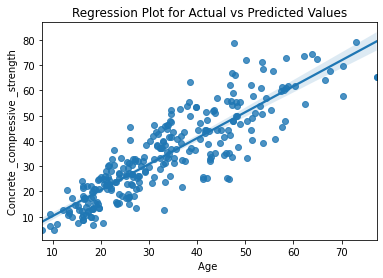

In [93]:
# Regression plot
g = sns.regplot(x=lasso_reg.predict(X_test), y=Y_test, fit_reg=True)
g.set(xlabel='Age ', ylabel='Concrete _compressive _strength', title='Model Predictions')
plt.title('Regression Plot for Actual vs Predicted Values')

Residual Plots

I plotted residual graphs for train, test seperatley and together using lasso regression.

Text(0.5, 1.0, 'Residual Plot for train data')

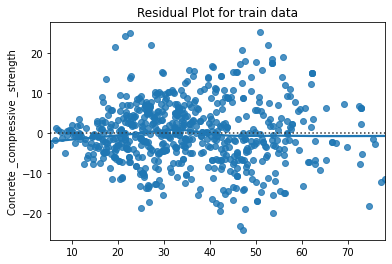

In [94]:
sns.residplot(x=lasso_reg.predict(X_train), y=Y_train, lowess=True)
plt.title('Residual Plot for train data')

Text(0.5, 1.0, 'Residual Plot for test data')

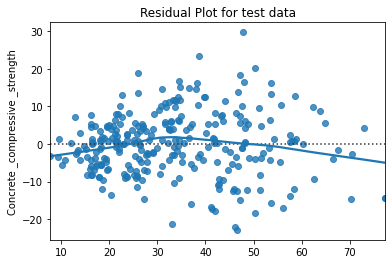

In [95]:
sns.residplot(x=lasso_reg.predict(X_test), y=Y_test, lowess=True)
plt.title('Residual Plot for test data')

Text(0, 0.5, 'Residuals')

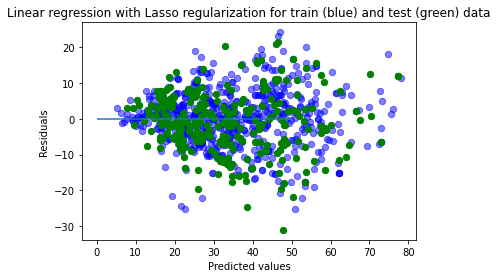

In [96]:
plt.scatter(lasso_reg.predict(X_train), lasso_reg.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lasso_reg.predict(X_test), lasso_reg.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title("Linear regression with Lasso regularization for train (blue) and test (green) data")
plt.xlabel("Predicted values")
plt.ylabel('Residuals')

In [97]:
# Features and thier respective coefficients
lasso_coeffs_data = pd.DataFrame(list(zip(X.columns, lasso_reg.coef_)), columns = ['Features', 'Estimated_Coefficients'])
lasso_coeffs_data.sort_values(by='Estimated_Coefficients', ascending=False)

,Features,Estimated_Coefficients
4,Superplasticizer,0.317774
7,Age,0.306940
0,Cement,0.101023
1,Blast_Furnace_Slag,0.072608
2,Fly_ Ash,0.044098
6,Fine_ Aggregate,-0.008615
5,Coarse_ Aggregate,-0.011978
3,Water,-0.222067


In [98]:
lasso_pos_coeffs_data = lasso_coeffs_data[(lasso_coeffs_data['Estimated_Coefficients'])>=0].sort_values(by='Estimated_Coefficients', ascending=False)
lasso_pos_coeffs_data

,Features,Estimated_Coefficients
4,Superplasticizer,0.317774
7,Age,0.306940
0,Cement,0.101023
1,Blast_Furnace_Slag,0.072608
2,Fly_ Ash,0.044098


In [99]:
lasso_neg_coeffs_data = lasso_coeffs_data[(lasso_coeffs_data['Estimated_Coefficients'])<0].sort_values(by='Estimated_Coefficients', ascending=True)
lasso_neg_coeffs_data

,Features,Estimated_Coefficients
3,Water,-0.222067
5,Coarse_ Aggregate,-0.011978
6,Fine_ Aggregate,-0.008615


In [100]:
from collections import OrderedDict
# Create a dictionary to store the train and test scores, best alpha values
scores = {'Index': ['Linear Reg','Ridge Reg','Lasso Reg'],
         'RMSE_train': [20426.160, 25725.420, 26498.918],
         'RMSE_test': [30352.931, 25777.429, 25777.429],
         'R2_train': [0.936, 0.898, 0.927 ],
         'R2_test': [0.843, 0.887, 0.880],
         'Best_alpha': ['N/A', 10.0, 1.0]}
scores = OrderedDict(scores)

# Create a dataframe from the dictionary
reg_models_scores = pd.DataFrame.from_dict(scores)
reg_models_scores

,Index,RMSE_train,RMSE_test,R2_train,R2_test,Best_alpha
0,Linear Reg,20426.160,30352.931,0.936,0.843,N/A
1,Ridge Reg,25725.420,25777.429,0.898,0.887,10.0
2,Lasso Reg,26498.918,25777.429,0.927,0.880,1.0


# DecisionTree

In [101]:
X = data.drop('Concrete _compressive _strength', axis=1)

In [102]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, data['Concrete _compressive _strength'], test_size=0.3, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(658, 8)
(283, 8)
(658,)
(283,)


In [103]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
dtr = DecisionTreeRegressor(ccp_alpha=0.0)
model5 = dtr.fit(X_train,Y_train)
predictions5 = dtr.predict(X_test)
m5=model5.score(X_test,Y_test )
RMSE5=np.sqrt(metrics.mean_squared_error(Y_test, predictions5))
print('Accuracy of model is', model5.score(X_test, Y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions5))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions5))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions5)))

Accuracy of model is 0.8218753982722896
Mean Absolute Error: 4.691613663133098
Mean Squared Error: 50.46295822536317
Root Mean Squared Error: 7.103728473510454


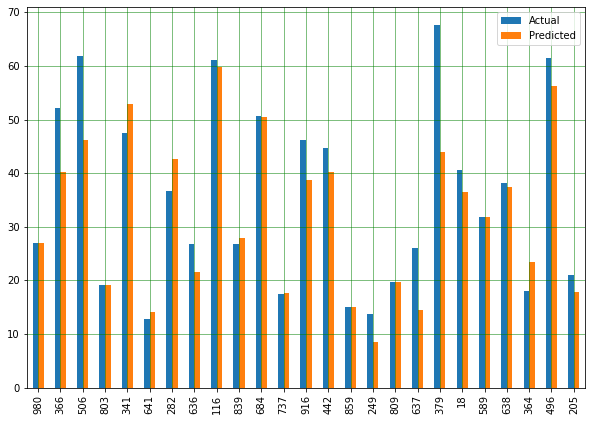

In [120]:
#Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions5})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Random forest regression

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
Rnd = RandomForestRegressor(ccp_alpha=0.0)
model4 = Rnd.fit(X_train, Y_train)
predictions4 = Rnd.predict(X_test)
m4=model4.score(X_test, Y_test)
RMSE4=np.sqrt(metrics.mean_squared_error(Y_test, predictions4))
print('Accuracy of model is', model4.score(X_test, Y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions4))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions4)))

Accuracy of model is 0.9008216664961362
Mean Absolute Error: 3.860250521622073
Mean Squared Error: 28.09736584347422
Root Mean Squared Error: 5.300694845345676


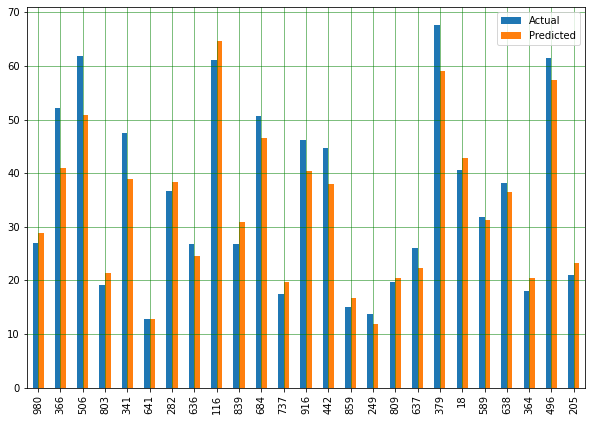

In [121]:
#Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions4})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# KNN regression¶

In [109]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
knn = KNeighborsRegressor(n_neighbors=2)
model6 = knn.fit(X_train, Y_train)
predictions6 = knn.predict(X_test)
m6=model6.score(X_test, Y_test)
RMSE6=np.sqrt(metrics.mean_squared_error(Y_test, predictions6))
print('Accuracy of model is', model6.score(X_test, Y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions6))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions6))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions6)))

Accuracy of model is 0.6274859617534911
Mean Absolute Error: 7.1887809187279155
Mean Squared Error: 105.53376775618374
Root Mean Squared Error: 10.272962949226661


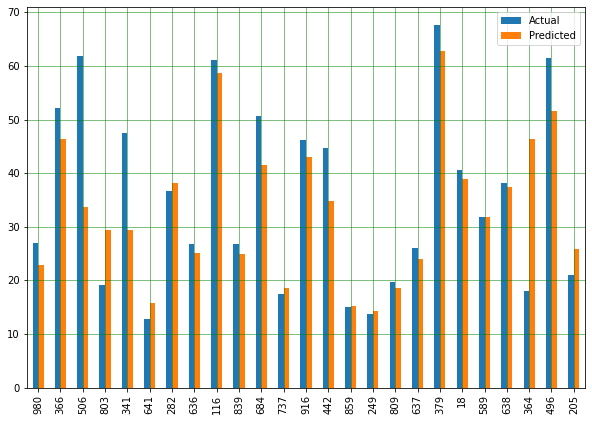

In [123]:
#Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual':Y_test, 'Predicted': predictions6})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# SVM regression

In [112]:
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn import metrics
svm= svm.SVR(kernel='linear')
model7 = svm.fit(X_train, Y_train)
predictions7 = svm.predict(X_test)
m7=model7.score(X_test, Y_test)
RMSE7=np.sqrt(metrics.mean_squared_error(Y_test, predictions7))
print('Accuracy of model is', model7.score(X_test, Y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions7))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions7))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions7)))

Accuracy of model is 0.7517001594196275
Mean Absolute Error: 6.580117619393622
Mean Squared Error: 70.34370525485035
Root Mean Squared Error: 8.387115431115179


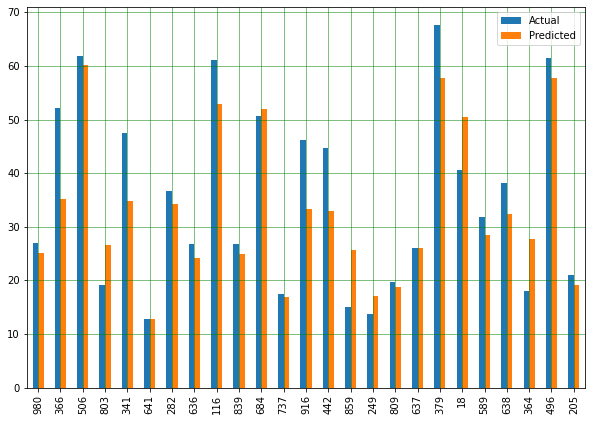

In [124]:
#Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions7})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Model Comparison through RMSE


In [125]:
data='height'

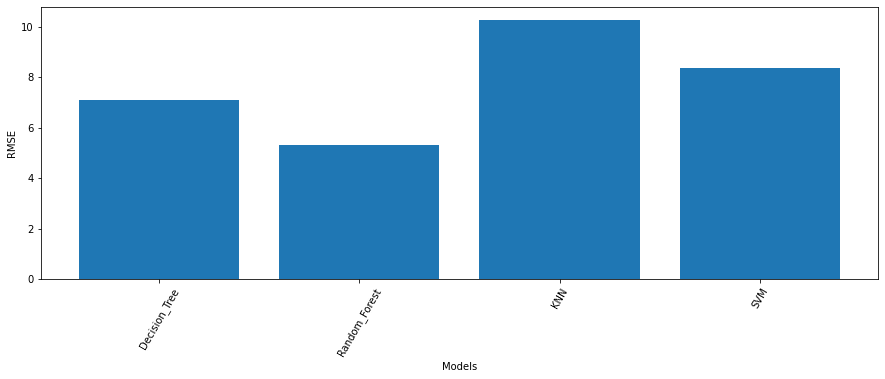

In [126]:
# Model Comparison
height = [ RMSE5, RMSE4, RMSE6, RMSE7]
bars = ['Decision_Tree','Random_Forest', 'KNN', 'SVM']
plt.figure(figsize=(15,5))
plt.bar(bars,height)
plt.xticks(rotation=60)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()

Observations:
From the above comparision of the list of regressions based on their RMSE
Random Forest has the lowest value.
KNN has the highest value.

Random Forest Regression is the best method that performs well in this dataset.
Random Forest has highest accuracy and lowest RMSE.
Random Forest is the best fit model for this dataset


# Hyperparameter Tuning

In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [128]:
from sklearn.feature_selection import RFE

model=RandomForestRegressor()


In [130]:
clf=RandomForestRegressor()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [144]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators=[1,10,100,200,400,1000]
max_features=['auto','sqrt']
max_depth=[3,6,10]
min_samples_leaf=[1,2,4,10]

random_grid= {'n_estimators': n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_leaf': min_samples_leaf}

In [148]:
clf=RandomForestRegressor()
clf_random_grid=RandomizedSearchCV(estimator=clf, param_distributions=random_grid, cv=5, verbose=2)

clf_random_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, n_estimators=400; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, n_estimators=400; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, n_estimators=400; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, n_estimators=400; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [3, 6, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'n_estimators': [1, 10, 100, 200, 400,
                                                         1000]},
                   verbose=2)

In [149]:
clf_random_grid.best_params_

{'n_estimators': 200,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [151]:
y_pred=clf_random_grid.predict(X_test)

In [152]:
from sklearn.model_selection import GridSearchCV

In [201]:
model_tune=RandomForestRegressor()

In [205]:


tune_parameter= {
                'n_estimators':[200,500],
                'max_features':['auto','sqrt','log2'],
                'max_depth':[4,5,6,7,8],
                #'criterion':['gini','entropy']

                }


In [206]:
clf_random_grid=GridSearchCV(estimator=model_tune, param_grid=tune_parameter, cv=5)

In [207]:
clf_random_grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [208]:
clf_random_grid.best_params_

{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}

In [209]:
clf_grid_search.best_params_, clf_grid_search.best_score_

({'criterion': 'gini',
  'max_depth': 10,
  'max_features': 'sqrt',
  'n_estimators': 10},
 nan)

In [215]:
model_final=RandomForestRegressor(n_estimators=30, max_depth=10,  max_features='log2')

In [216]:
model_final.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=30)

In [247]:
y_pred=model_final.predict(X_test)

In [248]:
features= pd.DataFrame()
features['Feature']=X.columns

In [249]:
features.head()

,Feature
0,Cement
1,Blast_Furnace_Slag
2,Fly_ Ash
3,Water
4,Superplasticizer


In [250]:
model_final.feature_importances_

array([0.23703262, 0.06253171, 0.04004694, 0.14145451, 0.07863184,
       0.05670599, 0.05349071, 0.33010568])

In [252]:
features['Support'] = model_final.feature_importances_

In [253]:
features.head()

,Feature,Support
0,Cement,0.237033
1,Blast_Furnace_Slag,0.062532
2,Fly_ Ash,0.040047
3,Water,0.141455
4,Superplasticizer,0.078632


In [254]:
features.sort_values('Support',ascending=False,inplace=True)
features.set_index('Feature',inplace=True)

<AxesSubplot:ylabel='Feature'>

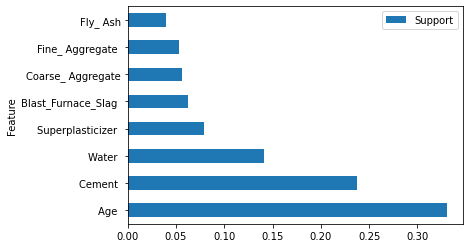

In [255]:
features.plot(kind='barh')